pip install diffusers accelerate

In [ ]:
!pip install diffusers
!pip install accelerate

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 11.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 297.4/297.4 kB 4.1 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.19.3-py3-none-manylinu

In [ ]:
import torch
from diffusers import StableDiffusionXLImg2ImgPipeline, DiffusionPipeline, StableDiffusionXLPipeline, AutoencoderKL,DDIMScheduler
import gc
from PIL import Image
import requests
from io import BytesIO
from IPython.display import display
import torch
from huggingface_hub import notebook_login
from transformers import pipeline

The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


0it [00:00, ?it/s]

####Checking prompt is comic friendly or not

In [ ]:
sentiment_pipeline = pipeline("sentiment-analysis")

def refine_prompt(prompt):
    result = sentiment_pipeline(prompt)[0]
    if result['label'] == 'POSITIVE' and result['score'] > 0.75:
        print(result['label'], result['score'])
        return True, prompt
    else:
        return False, "Prompt does not match comic-friendly criteria."

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

####**Model: runwayml/stable-diffusion-v1-5**

In [ ]:
from diffusers import StableDiffusionPipeline
import torch

model_id = "runwayml/stable-diffusion-v1-5"
pipe = StableDiffusionPipeline.from_pretrained(model_id, torch_dtype=torch.float16)
pipe = pipe.to("cuda")

n_steps = 40
high_noise_frac = 0.8

prompt = "Why does the moon change phases throughout the month?"

image = pipe(
              prompt=prompt,
              num_inference_steps=n_steps,
              denoising_end=high_noise_frac,
            ).images[0]


model_index.json:   0%|          | 0.00/541 [00:00<?, ?B/s]

Fetching 15 files:   0%|          | 0/15 [00:00<?, ?it/s]

scheduler/scheduler_config.json:   0%|          | 0.00/308 [00:00<?, ?B/s]

tokenizer/special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

(…)ature_extractor/preprocessor_config.json:   0%|          | 0.00/342 [00:00<?, ?B/s]

safety_checker/config.json:   0%|          | 0.00/4.72k [00:00<?, ?B/s]

text_encoder/config.json:   0%|          | 0.00/617 [00:00<?, ?B/s]

tokenizer/merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

tokenizer/tokenizer_config.json:   0%|          | 0.00/806 [00:00<?, ?B/s]

unet/config.json:   0%|          | 0.00/743 [00:00<?, ?B/s]

tokenizer/vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

vae/config.json:   0%|          | 0.00/547 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/492M [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/3.44G [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

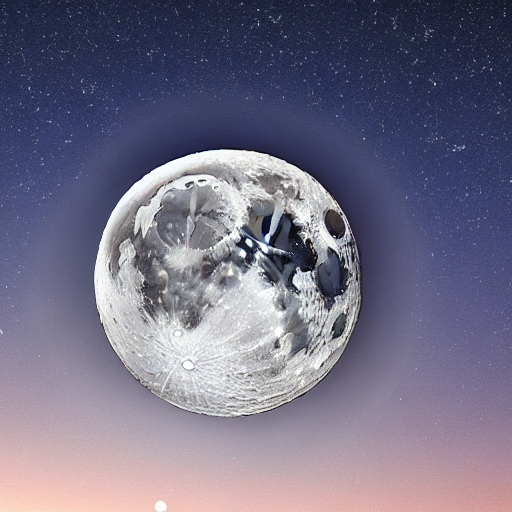

In [ ]:
image

####**Model: stabilityai/stable-diffusion-xl-base-1.0**

In [ ]:
# load both base & refiner
base = DiffusionPipeline.from_pretrained(
    "stabilityai/stable-diffusion-xl-base-1.0", torch_dtype=torch.float16, variant="fp16", use_safetensors=True
)
base.to("cuda")
refiner = DiffusionPipeline.from_pretrained(
    "stabilityai/stable-diffusion-xl-refiner-1.0",
    text_encoder_2=base.text_encoder_2,
    vae=base.vae,
    torch_dtype=torch.float16,
    use_safetensors=True,
    variant="fp16",
)
refiner.to("cuda")

# Define how many steps and what % of steps to be run on each experts (80/20) here
n_steps = 40
high_noise_frac = 0.8

prompt = "Why does the moon change phases throughout the month?"

# run both experts
image = base(
    prompt=prompt,
    num_inference_steps=n_steps,
    denoising_end=high_noise_frac,
    output_type="latent",
).images
image = refiner(
    prompt=prompt,
    num_inference_steps=n_steps,
    denoising_start=high_noise_frac,
    image=image,
).images[0]


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

Loading pipeline components...:   0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

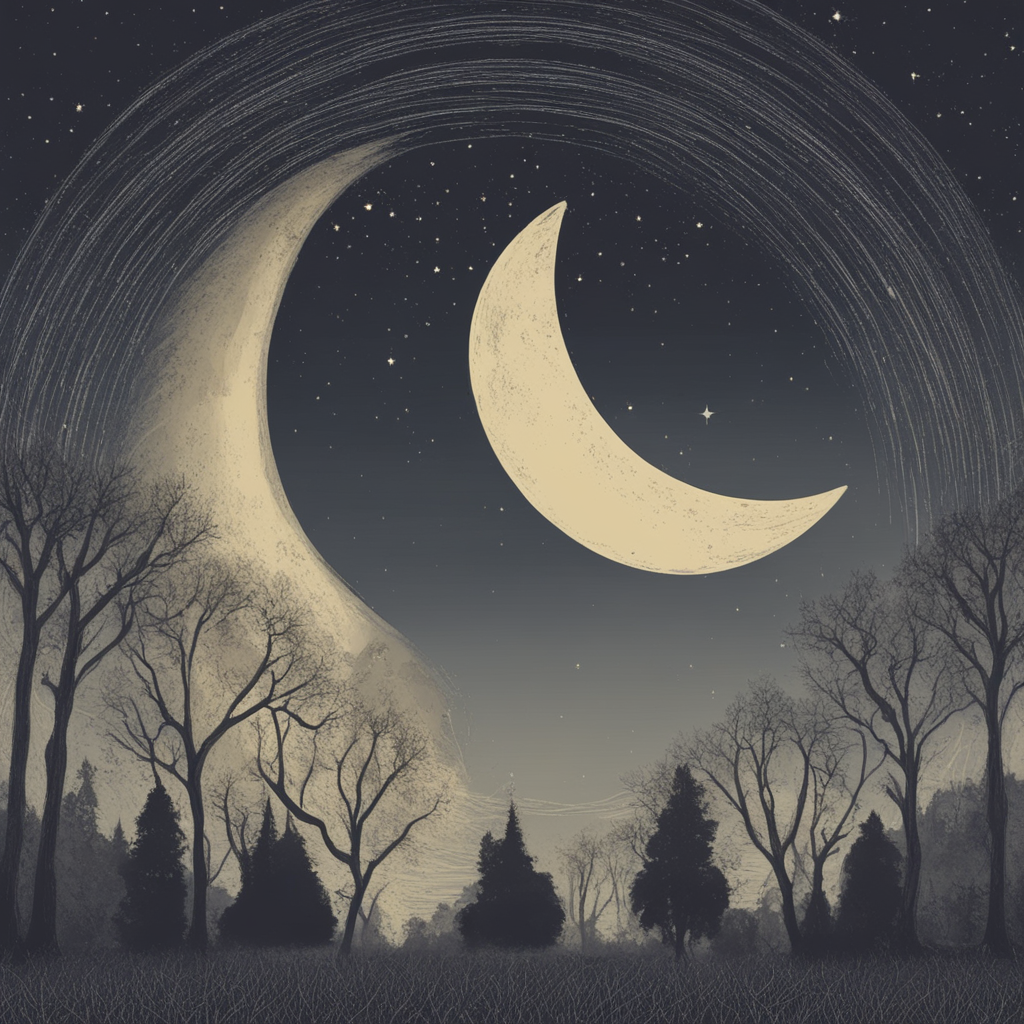

In [ ]:
image

####**Model: playgroundai/playground-v2.5-1024px-aesthetic**

In [ ]:
pipe = DiffusionPipeline.from_pretrained(
    "playgroundai/playground-v2.5-1024px-aesthetic",
    torch_dtype=torch.float16,
    variant="fp16",
).to("cuda")

prompt = "What is the significance of the Battle of Hastings in 1066?"
aimage_playai = pipe(prompt=prompt, num_inference_steps=50, guidance_scale=3).images[0]


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

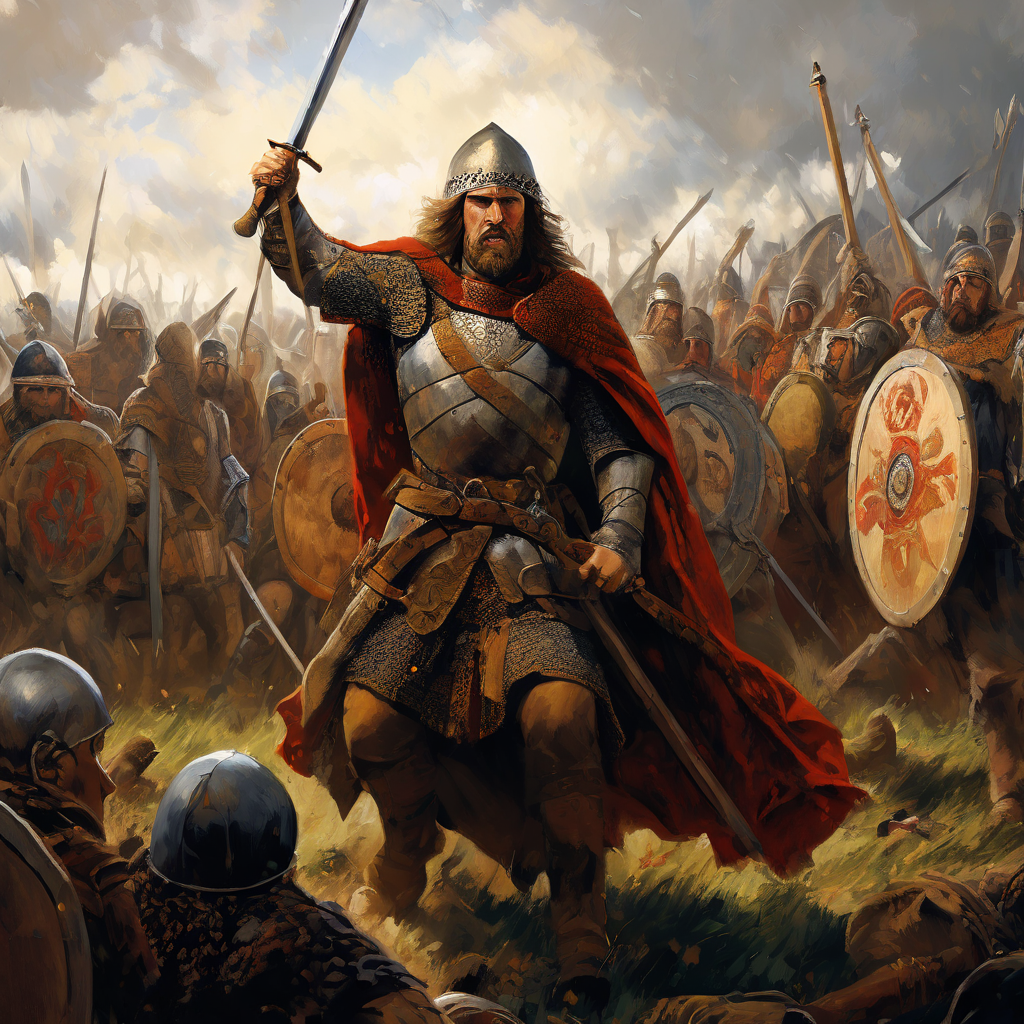

In [ ]:
aimage_playai

####**Model: stabilityai/stable-diffusion-2-1**

In [ ]:
from diffusers import StableDiffusionPipeline, DPMSolverMultistepScheduler

model_id = "stabilityai/stable-diffusion-2-1"

# Use the DPMSolverMultistepScheduler (DPM-Solver++) scheduler here instead
pipe = StableDiffusionPipeline.from_pretrained(model_id, torch_dtype=torch.float16)
pipe.scheduler = DPMSolverMultistepScheduler.from_config(pipe.scheduler.config)
pipe = pipe.to("cuda")

prompt = "Explain the role of gut bacteria in human digestion."
image_stabai = pipe(prompt).images[0]

Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

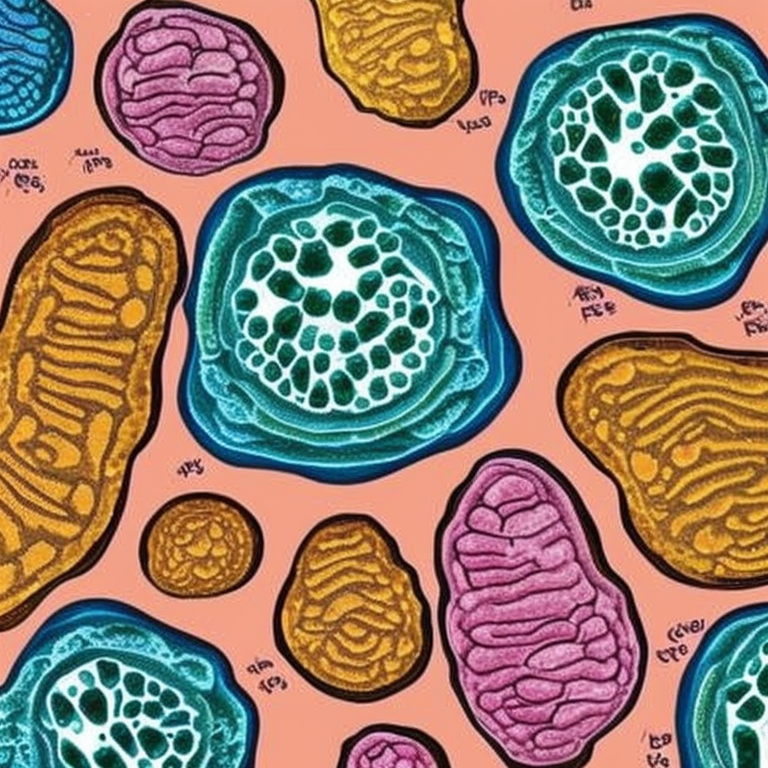

In [ ]:
image_stabai

In [ ]:
def is_educational(prompt):
    # List of keywords indicative of educational content
    educational_keywords = [
        'explain', 'demonstrate', 'illustrate', 'what is', 'how does',
        'history of', 'science behind', 'mathematics of', 'educational',
        'biology of', 'physics of', 'chemistry of', 'learn about', 'depict'
    ]

    # Convert the prompt to lowercase to ensure the search is case-insensitive
    prompt_lower = prompt.lower()

    # Check if any of the educational keywords appear in the prompt
    for keyword in educational_keywords:
        if keyword in prompt_lower:
            return True  # The prompt is considered educational

    # If none of the keywords were found, the prompt is not considered educational
    return False

# # Example usage:
# prompt = "Draw a fantasy landscape with dragons flying over a castle on a mountain"
# if is_educational(prompt):
#     print("This prompt is educational.")
# else:
#     print("This prompt is not educational.")


In [ ]:
import re

def is_educational(prompt):
    educational_keywords = [
        'explain', 'demonstrate', 'illustrate', 'what is', 'how does',
        'history of', 'science behind', 'mathematics of', 'educational',
        'biology of', 'physics of', 'chemistry of', 'learn about', 'depict'
    ]
    non_educational_keywords = [
        'fantasy', 'imagine', 'magical', 'legendary'
    ]
    educational_patterns = [
        r'\bhow to\b', r'\bwhy does\b', r'\bwhat are the\b',
        r'\bthe importance of\b', r'\bthe principles of\b'
    ]

    prompt_lower = prompt.lower()
    score = 0

    # Check for educational keywords
    for keyword in educational_keywords:
        if keyword in prompt_lower:
            score += 1

    # Check for non-educational keywords
    for keyword in non_educational_keywords:
        if keyword in prompt_lower:
            score -= 1  # Penalize the presence of non-educational keywords

    # Check for patterns indicating educational content
    for pattern in educational_patterns:
        if re.search(pattern, prompt_lower):
            score += 2  # Give more weight to pattern matches

    # Consider simple negations
    if "not" in prompt_lower:
        score -= 1

    # Define a threshold for considering a prompt educational
    threshold = 1  # Adjust based on testing and desired sensitivity
    return score >= threshold

# Example usage
prompt = "Tell us about the life of a butterfly from egg to adult"
print(is_educational(prompt))  # Expected: True

prompt = "Imagine a world where dragons are real."
print(is_educational(prompt))  # Expected: False


False
False


In [ ]:
prompts = [
  "Tell us about the life of a butterfly from egg to adult",
  "Illustrate the process of evaporation and condensation in the water cycle.",
  "What is the significance of the Battle of Hastings in 1066?",
  "Explain Newton's laws of motion using everyday examples.",
  "Demonstrate how to solve a quadratic equation.",
  "The adventures of a magical unicorn in an enchanted forest.",
  "Create a story about a pirate searching for treasure on a deserted island.",
  "How does photosynthesis work in plants?",
  "What are the principles behind renewable energy sources?",
  "Imagine a future where cars fly and buildings float in the sky.",
  "The science behind baking a perfect loaf of bread.",
  "Why does the moon change phases throughout the month?",
  "A day in the life of a Roman gladiator.",
  "Draw a fantasy landscape with dragons flying over a castle.",
  "Explain the role of gut bacteria in human digestion."
]

In [ ]:
for prompt in prompts:
  print(prompt," --> ",is_educational(prompt))


Tell us about the life of a butterfly from egg to adult  -->  False
Illustrate the process of evaporation and condensation in the water cycle.  -->  True
What is the significance of the Battle of Hastings in 1066?  -->  True
Explain Newton's laws of motion using everyday examples.  -->  True
Demonstrate how to solve a quadratic equation.  -->  True
The adventures of a magical unicorn in an enchanted forest.  -->  False
Create a story about a pirate searching for treasure on a deserted island.  -->  False
How does photosynthesis work in plants?  -->  True
What are the principles behind renewable energy sources?  -->  True
Imagine a future where cars fly and buildings float in the sky.  -->  False
The science behind baking a perfect loaf of bread.  -->  True
Why does the moon change phases throughout the month?  -->  True
A day in the life of a Roman gladiator.  -->  False
Draw a fantasy landscape with dragons flying over a castle.  -->  False
Explain the role of gut bacteria in human di

In [ ]:
def refine_prompt(original_prompt):
    # Add any specific adjustments to the prompt here
    # This is a simple example that ensures certain keywords are included
    # for better alignment with educational content
    refined_keywords = ["educational", "illustrative", "clear", "detailed"]
    for keyword in refined_keywords:
        if keyword not in original_prompt:
            original_prompt += f", {keyword}"
    return original_prompt

In [ ]:
def generate_educational_image(prompt, negative_prompt):


      pipe = DiffusionPipeline.from_pretrained(
          "playgroundai/playground-v2.5-1024px-aesthetic",
          torch_dtype=torch.float16,
          variant="fp16",
      ).to("cuda")

      negative_prompt = negative_prompt + " ugly, deformed, noisy, blurry, distorted, Avoid dark, night-time scenes, Do not use abstract art styles, Avoid violence, any form of discrimination, or explicit content"

      image = pipe(prompt=prompt,
                   negative_prompt=negative_prompt,
                   num_images_per_prompt=2,
                   width=1024,
                   height=1024,
                   prompt_strength=0.8,
                   num_inference_steps=50,
                   guidance_scale=7,
                   scheduler="DPMSolver++").images
      print(image)
      return image

In [ ]:
prompt = "What are the principles behind renewable energy sources?"
negative_prompt = ""
# prompt = "Show a close-up of a honeybee pollinating a large sunflower, with the garden blurred in the background."
if is_educational(prompt):
  refinePrompt = refine_prompt(prompt)
  educational_image = generate_educational_image(refinePrompt, "")
else:
    print("Prompt is not educational-friendly.")
    educational_image = None


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

[<PIL.Image.Image image mode=RGB size=1024x1024 at 0x79543D8AB760>, <PIL.Image.Image image mode=RGB size=1024x1024 at 0x79543D8AB7F0>]


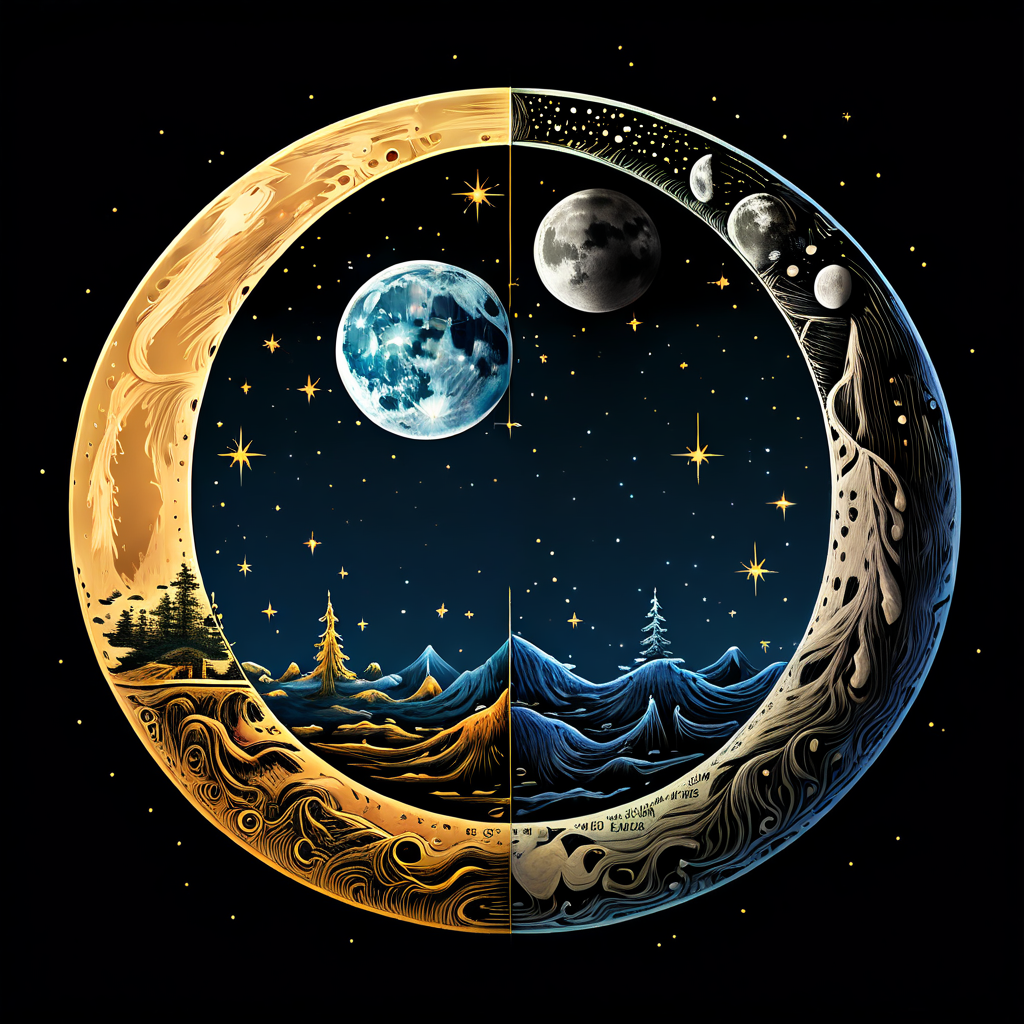

In [ ]:
educational_image[0]

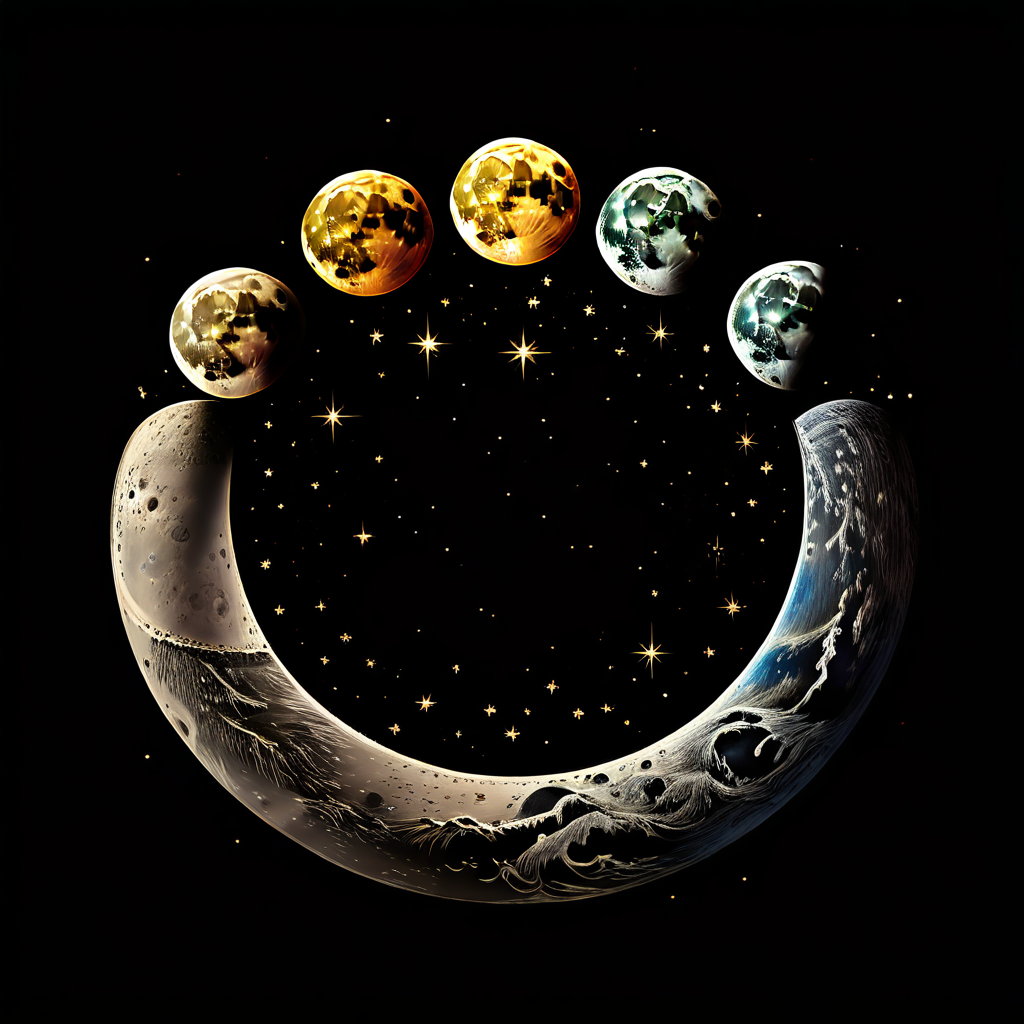

In [ ]:
educational_image[1]